# Final Project

## Framing

**Introduction**: The dataset I'm working wiht are conference proceedings in cognitive and learning sciences from 1995-2015. I'm looking forward to seeing what practitioners and researchers were thinking about and working on and how current events shaped what people were interested in researching, especially as it relates to educational technology and psychology. 

**Research question(s)**: What trends persist and change in the learning sciences over the past 20 years? Are there decades or 5-year periods where more trends change than others? Are some technology-focused, especially as we move into the 2010s? 

**Hypotheses**:
    * Describe 2-3 hypotheses that you're planning to test with your dataset
    1. As we get later into the conference proceedings (2010-2015), there will be a greater focus on machine learning and artificial intelligence and, conversely, social emotional learning, as well, in comparison to 1995-2000. 
    2. Current events will, across the two decades, have at least indirect impacts on how educators and researchers examine the learning sciences, as they look for techniques outside of solely traditional pedagogy to support students. 
    * Each hypoteses should be based on academic research (cite a paper) and/or background knowledge that you have about the dataset if you've collected it yourself (e.g., if you've conducted interviews)
    * Each hypotheses should be formulated as an affirmation (and not a question)
    * You can also describe alternative hypotheses, if you think that your results could go either way (but again, have a rationale as for why)

**Results**:
    * how are you planning to test each hypothesis? What models are you thinking of using?
For the first hypothesis, I will use a co-word analysis. This is a means of clustering that uses the keywords of a paper to see if they're present in other papers. If they're present in other papers, that will demonstrate that there's not only a connection between those two papers, but also a trend within that time period (one year) regarding that topic (e.g. Machine learning in education, social emotional learning, peer to peer learning, etc.). This will also provide a cloud of words (a network) demonstrating how the items are connected. 
    * what are the best results you can hope for? Is that interesting / relevant for other researchers?
The best results would demonstrate strong connections between papers within the same 5 year period or at least within the same conference, demonstrating a unity across the field as to what's important. Since this is the first time this dataset has been examined, I hope that these methods will be good practice for me and interesting for other interested in doing corpus-related analysis, like co-word analysis or social network analysis. 
    * what are implications of your potential findings for practioners?

**Threads**
    * Describe issues that might arise during the analyses above
    * Come up with backup plans in case you run into theses issues

## Data Exploration

Describe your raw data below; provide definition / explanations for the measures you're using

## Data Cleaning

In [1]:
import glob
files = glob.glob("/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/*.txt")
print(files)

['/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts1999.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts1998.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2015.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2014.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2000.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2002.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2013.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2007.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts20022.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstract

In [2]:
abstracts = {}

for filename in files: 
    with open (filename, "r", encoding='utf-8', errors='ignore') as f:
        content_of_file = f.read()
        # get the year of these abstracts
        year = filename.replace('.txt','').split('abstracts')[-1]
        # get a list of abstracts using split
        list_abstracts = content_of_file.split('\n\n')
        # save the data to your dictionary
        abstracts[year] = list_abstracts

In [3]:
print(abstracts['1999'])

[" Collaborative environments typically provide a medium for realizing or capturing discussion. Whilevaluable, the discussion is often decontextualized from the situation in which it makes sense. Anchoredcollaboration environments provide a mechanism for connecting collaboration to digital media content, suchas Web-based syllabi and assignment descriptions. The most significant learning context in most classes isstill the face-to-face whole class lecture or discussion. The Classroom 2000 project at Georgia Tech iscapturing classroom experiences in multiple media: audio, video, presenter's slides, presenter's whiteboardmarkings, and students' notes. By connecting the Classroom 2000 captured lectures to a persistentcollaboration space, we provide (a) a mechanism for asynchronous collaboration that is anchored in classcontexts and (b) a means for treating class activity as persistent learning medium for later comment andcollaborative extension. This paper describes a pilot study to create

In [4]:
for year, list_of_abstracts in abstracts.items(): 
    for i, abstract in enumerate(list_of_abstracts):
        list_of_abstracts[i] = list_of_abstracts[i].lower()
        print(list_of_abstracts[0])

 collaborative environments typically provide a medium for realizing or capturing discussion. whilevaluable, the discussion is often decontextualized from the situation in which it makes sense. anchoredcollaboration environments provide a mechanism for connecting collaboration to digital media content, suchas web-based syllabi and assignment descriptions. the most significant learning context in most classes isstill the face-to-face whole class lecture or discussion. the classroom 2000 project at georgia tech iscapturing classroom experiences in multiple media: audio, video, presenter's slides, presenter's whiteboardmarkings, and students' notes. by connecting the classroom 2000 captured lectures to a persistentcollaboration space, we provide (a) a mechanism for asynchronous collaboration that is anchored in classcontexts and (b) a means for treating class activity as persistent learning medium for later comment andcollaborative extension. this paper describes a pilot study to create a

 this paper presents a case study in which two participants with opposing points of view used a shared document for purposes of dealing with a controversy on the effectiveness of homeopathic medicine. the participants were working by turns on a common presentation that  should  outline  their  opinions  on  the  topic.  during  this  alternating  process  they  had  to think  aloud  to  make  individual  processes  observable.  in  addition,  we  analyzed  the development of the shared text. we combined a content analysis and the think-aloud data to measure  internal  and  external  processes  of  knowledge  construction,  and  we  describe  how these processes influenced each other. this procedure led to insights into the development of perception  shared  by  the  participants  and  into  the  resulting  knowledge  construction  with respect  to  quantitative  and  qualitative  processes.  in  particular,  we  analyzed  the  interplay between the participants’ thinking and writing pr

 this paper presents a case study in which two participants with opposing points of view used a shared document for purposes of dealing with a controversy on the effectiveness of homeopathic medicine. the participants were working by turns on a common presentation that  should  outline  their  opinions  on  the  topic.  during  this  alternating  process  they  had  to think  aloud  to  make  individual  processes  observable.  in  addition,  we  analyzed  the development of the shared text. we combined a content analysis and the think-aloud data to measure  internal  and  external  processes  of  knowledge  construction,  and  we  describe  how these processes influenced each other. this procedure led to insights into the development of perception  shared  by  the  participants  and  into  the  resulting  knowledge  construction  with respect  to  quantitative  and  qualitative  processes.  in  particular,  we  analyzed  the  interplay between the participants’ thinking and writing pr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
! pip install pyspellchecker

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', 
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', '@', '",', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '−', '”', '“', '’']


# remove ponctuation
for i,abstract in enumerate(list_of_abstracts): 
    for punc in punctuation: 
        abstract = abstract.replace(punc, ' ')
    list_of_abstracts[i] = abstract
    print(list_of_abstracts[0])

 this paper reports the synthesis of six case studies of students  engagement in inquiry based learning activities in an undergraduate geology course  details of how students engaged in the scientific inquiry practices of formulating explanations from evidence  and communicating and justifying  proposed  explanations  are  presented   data  for  this  study  included  classroom observations  and  archival  data   i e    student  work  samples   collected  during  a  semester long investigation   the  results  suggest  that  students  were  able  to  appropriate  these  inquiry  practices with varying degrees of success  however  it was not without its challenges   a detailed discussion of the ways in which students were successful  and where they had challenges engaging in these inquiry  practices  is  presented   with  the  goal  of  helping  guide  practitioners  and  researchers  in creating learning environments that can take full advantage of the pedagogical strategy of inquiry ba

 this paper reports the synthesis of six case studies of students  engagement in inquiry based learning activities in an undergraduate geology course  details of how students engaged in the scientific inquiry practices of formulating explanations from evidence  and communicating and justifying  proposed  explanations  are  presented   data  for  this  study  included  classroom observations  and  archival  data   i e    student  work  samples   collected  during  a  semester long investigation   the  results  suggest  that  students  were  able  to  appropriate  these  inquiry  practices with varying degrees of success  however  it was not without its challenges   a detailed discussion of the ways in which students were successful  and where they had challenges engaging in these inquiry  practices  is  presented   with  the  goal  of  helping  guide  practitioners  and  researchers  in creating learning environments that can take full advantage of the pedagogical strategy of inquiry ba

In [7]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown([])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

In [8]:
import pandas as pd
from collections import defaultdict 

word_freq = defaultdict(int)
for abstract in list_of_abstracts:
    for word in abstract.split():
        word_freq[word] += 1

df = pd.DataFrame.from_dict(word_freq, orient='index').sort_values(0, ascending=False).rename(columns={0: 'abs_freq'})
print(df[0:30])

           abs_freq
the            1331
of             1146
and            1014
in              712
to              699
a               554
that            311
learning        297
for             264
students        262
this            257
on              228
we              216
as              184
is              180
with            170
their           158
an              152
study           138
science         130
research        127
are             124
from            123
knowledge       116
teachers        111
based           109
by              107
design          105
were            104
these            99


In [21]:
stop_words =['in', 'this', 'in this paper', 'students', 'as', 'from', 'knowledge',
            'teachers', 'were', 'these', 'school', 'how', 'two', 'student', 'which', 'was',
            'about', 'paper', 'more', 'development', 'between', 'used', 'our', 'results',
            'using', 'or', 'they', 'such', 'both', 'at', 'also', 'and', 'two', 'a', 'an', 'it',
            'is', 'the', 'in', 'to', 'that', 'learning', 'this', 'on', 'we', 'with', 'their', 
            'study', 'science', 'research', 'are', 'have', 'knowledge', 'teachers', 'based', 'by', 'were', 
            'these', 'of', 'the', 'for']

for i,abstract in enumerate(list_of_abstracts):
    for stop_word in stop_words:
        abstract = abstract.replace(' ' + stop_word + ' ', ' ')
    list_of_abstracts[i] = abstract

print(list_of_abstracts[50])

    uses   concept   affinity  space   analyze  youth  participation   summer camp  examining took virtual identities astronomers  merged them real identities   varying degrees  adopted projective identities themselves scientists   analyzing camper interviews  i investigate degree astronomy camp affinity space present individual  cases ways campers make  meaning  experiences creating different identities  


In [22]:
import math
import numpy as np

In [23]:
def get_vocabulary(list_of_abstracts):
    voc = []
    for abstract in list_of_abstracts:
        for word in abstract.split():
            if word not in voc: 
                voc.append(word)
    voc = list(set(voc))
    voc.sort()
    return voc

# Then print the length of your vocabulary (it should be 
# around 5500 words)
vocabulary = get_vocabulary(list_of_abstracts)
print(len(vocabulary))

3842


In [24]:
def flatten_and_overlap(list_of_documents, window_size=100, overlap=25):
    
    # create the list of overlapping documents
    new_list_of_abstracts = []
    
    # flatten everything into one string
    flat = ""
    for abstract in list_of_abstracts:
        flat += abstract
    
    # split into words
    flat = flat.split()

    # create chunks of 100 words
    high = window_size
    while high < len(flat):
        low = high - window_size
        new_list_of_abstracts.append(flat[low:high])
        high += overlap
    return new_list_of_abstracts

chunks = flatten_and_overlap(list_of_abstracts)

In [25]:
for chunk in chunks: 
    assert(len(chunk) == 100)
    
print(len(chunks))

653


In [26]:
import numpy as np
import pandas as pd
df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 652
Columns: 3842 entries, 0115699 to ™
dtypes: int64(3842)
memory usage: 19.1 MB


In [27]:
for i,chunk in enumerate(chunks):
    for word in chunk:
        if word in df.columns: 
            df.loc[i,word] += 1

In [28]:
def abstracts_by_words_df(chunks, vocabulary):
    df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
    
    # fill out the matrix with counts
    for i,chunk in enumerate(chunks):
        for word in chunk:
            if word in df.columns: 
                df.loc[i,word] += 1
            
    return df

# call the function and check that the resulting dataframe is correct
df = abstracts_by_words_df(chunks, vocabulary)

In [29]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

ks = range(1,11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to df
    model.fit(df)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

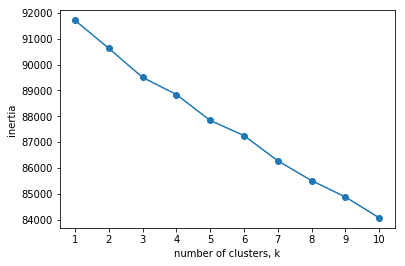

In [30]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

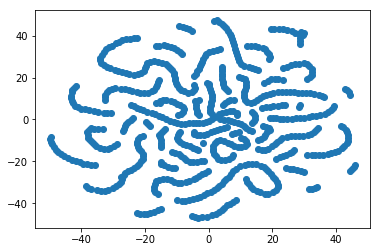

In [19]:
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys)
plt.show()

In [32]:
kmeans_results = KMeans(n_clusters=10).fit(df)

for n in range(kmeans_results.n_clusters):
    print("Cluster ", n, ": ", end=" ")
    
    centroid = kmeans_results.cluster_centers_[n]
    
    indicies = centroid.argsort()[-11:]
    
    for i in indicies:
        print(vocabulary[i], end=" ")
    
    print(" ")

Cluster  0 :  inquiry while engaged asking answering class question teacher same classes practices  
Cluster  1 :  through difficulty essentialist individual passage cultural theory erikson item s identity  
Cluster  2 :  been epistemic model new games teacher practices be education can inquiry  
Cluster  3 :  map grade analysis level collaborative be support data discourse s model  
Cluster  4 :  pd i design stories patterns can oriented reform mathematics materials curriculum  
Cluster  5 :  model societal society not solving group problem models mental social ideal  
Cluster  6 :  representations participants not solving can problem be s engineering understanding design  
Cluster  7 :  be environment content tools s process technology learners can collaborative design  
Cluster  8 :  srl condition tasks processes participants 1 one questions beliefs task self  
Cluster  9 :  instruction scientific analysis conceptual problem be classroom s understanding group use  


In [35]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering(n_clusters=6).fit(df)

print(clustering)

clf = NearestCentroid()
clf.fit(df, clustering.labels_)

centroids_words = [[] for i in range(6)]

for i in range(0,6):
    for j in range(1,11):
        n = np.argsort(clf.centroids_[i])[-j]
        centroids_words[i].append(df.columns[n])

for i in range(0,6):
    print(i,centroids_words[i])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func='deprecated')
0 ['design', 'be', 's', 'can', 'use', 'understanding', 'problem', 'model', 'one', 'group']
1 ['curriculum', 'reform', 'mathematics', 'i', 'materials', 'can', 'discourse', 'patterns', 'classrooms', 'oriented']
2 ['s', 'theory', 'will', 'session', 'sciences', 'education', 'cultural', 'games', 'practice', 'be']
3 ['self', 'achievement', 'perception', 'skaalvik', 'subsequent', 'orientation', 'there', 'goal', 'interest', 'concept']
4 ['practices', 'classes', 'same', 'teacher', 'class', 'while', 'engaged', 'network', 'inquiry', 'asking']
5 ['ideal', 'social', 'mental', 'models', 'problem', 'group', 'solving', 'society', 'not', 'societal']
